In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

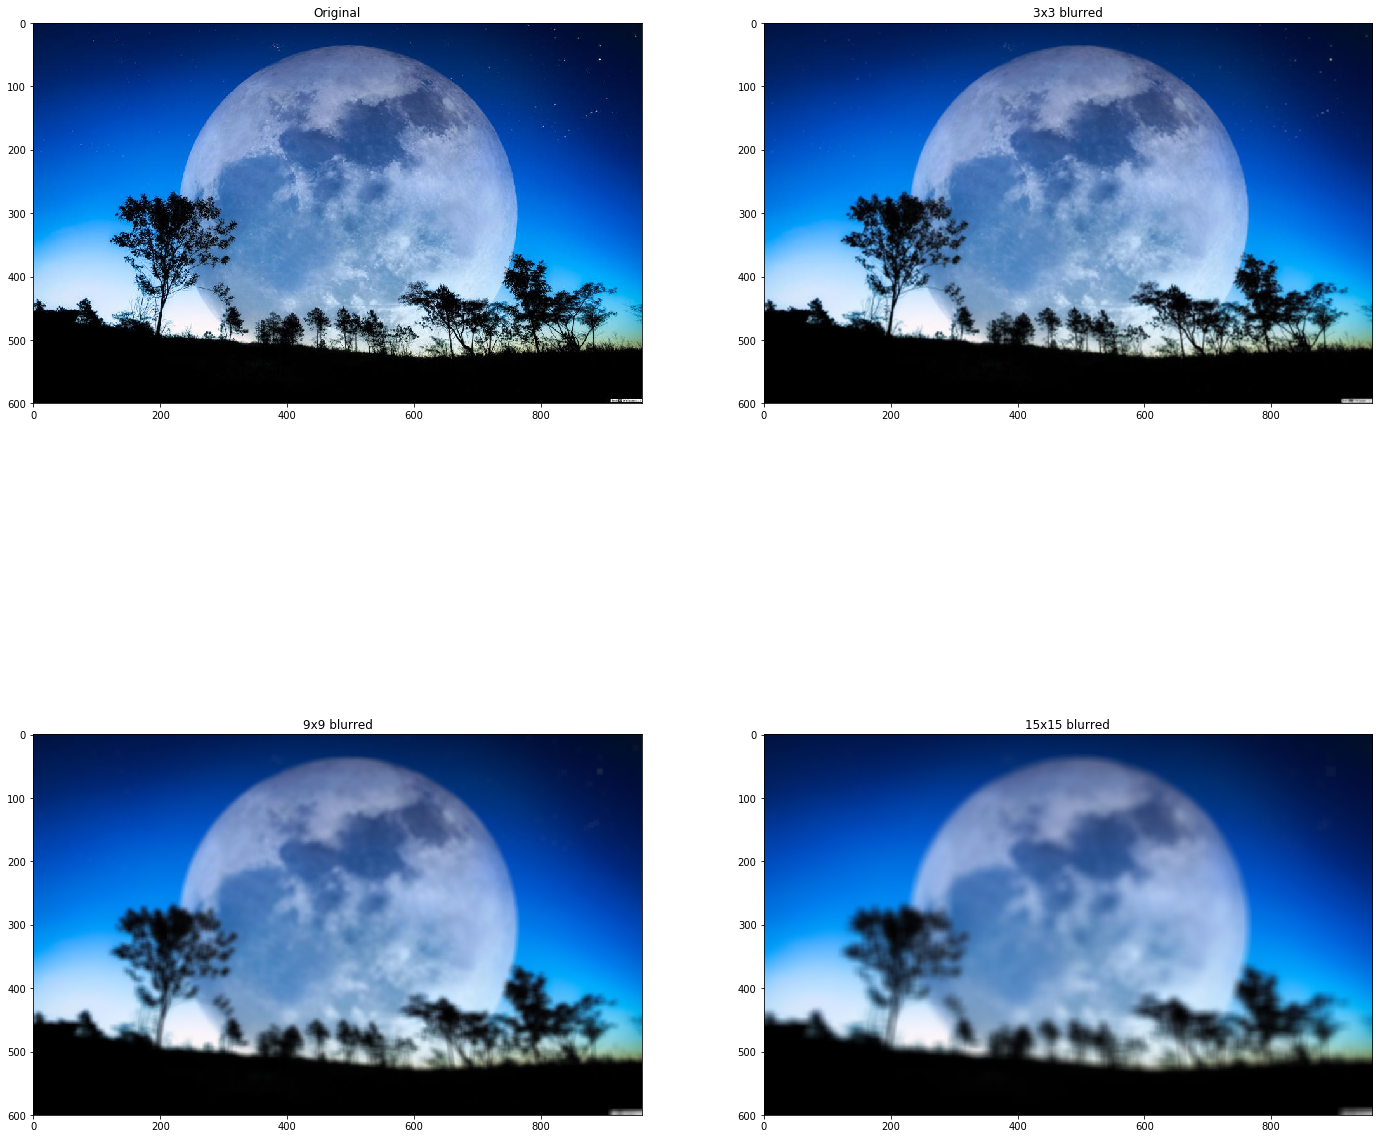

In [55]:
# Image blurring
img = cv2.imread("problem2/moon.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 블러링 마스크 정의
blur_mask1 = np.ones((3,3), np.float32)
blur_mask1 /= 9 # 3*3

blur_mask2 = np.ones((9,9), np.float32)
blur_mask2 /= 81 # 9*9

blur_mask3 = np.ones((15,15), np.float32)
blur_mask3 /= 225 # 15*15

# 컨볼류션(필터)연산 수행
blur_img1 = cv2.filter2D(img, -1, blur_mask1)
blur_img2 = cv2.filter2D(img, -1, blur_mask2)
blur_img3 = cv2.filter2D(img, -1, blur_mask3)

plt.figure(figsize=(24,24))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(2,2,2)
plt.title("3x3 blurred")
plt.imshow(blur_img1)

plt.subplot(2,2,3)
plt.title("9x9 blurred")
plt.imshow(blur_img2)

# imwrite(경로, 이미지 배열 변수)
# cv2.imwrite("./problem2/output/moon(blur).jpg", blur_img2)

plt.subplot(2,2,4)
plt.title("15x15 blurred")
plt.imshow(blur_img3)

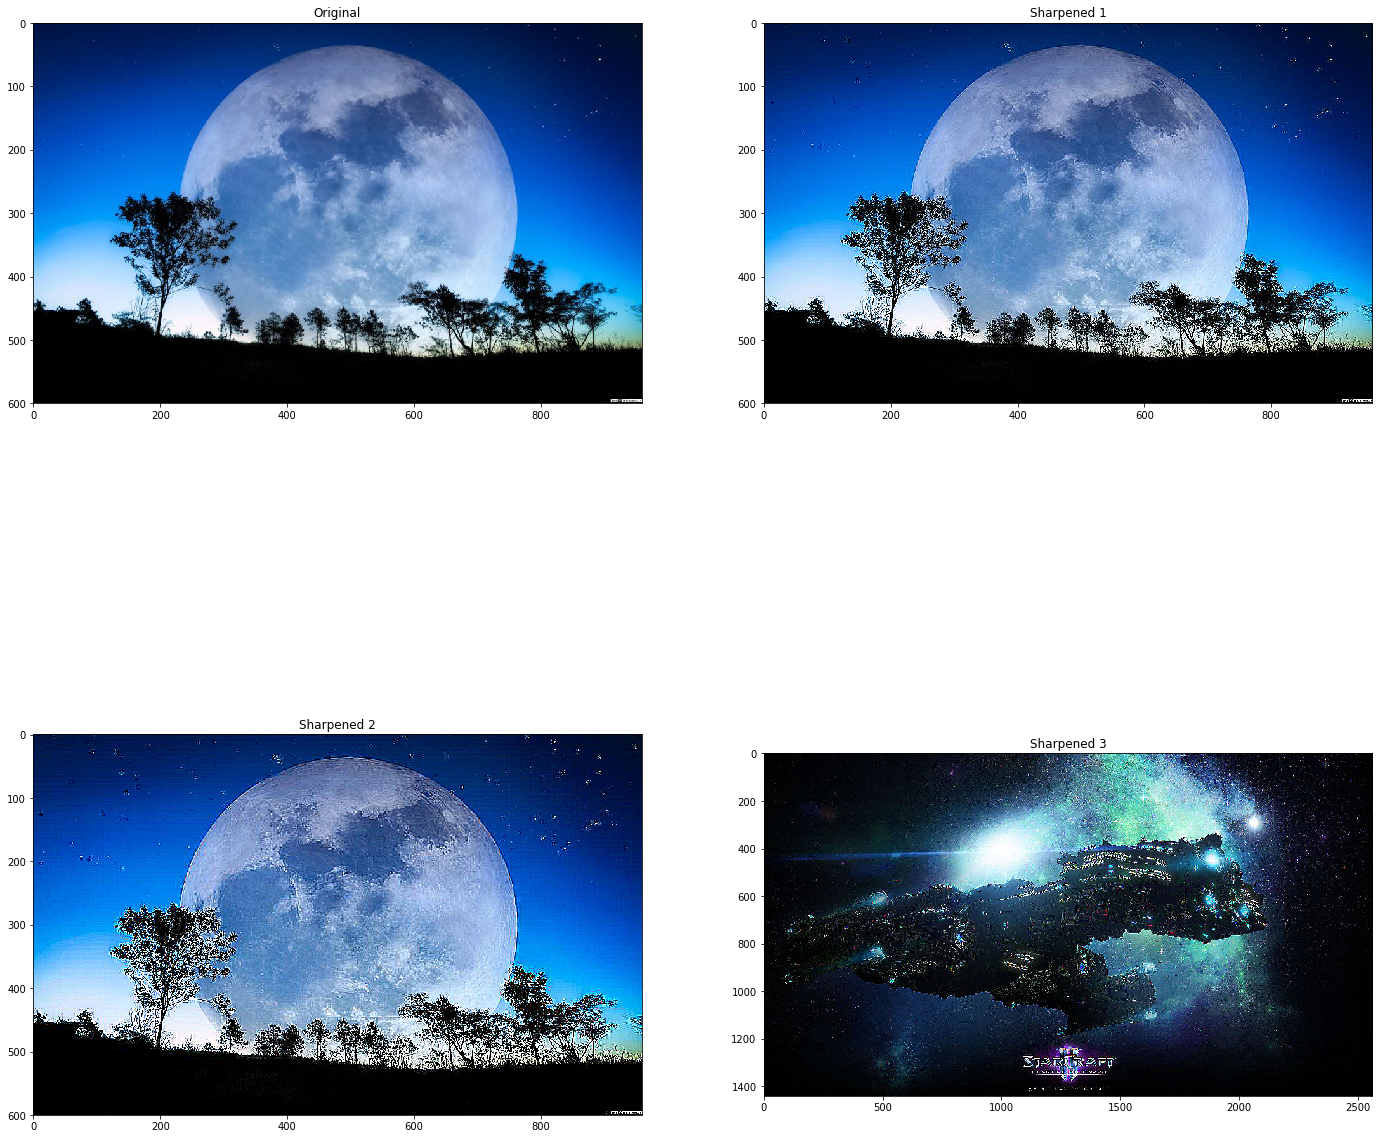

In [58]:
# Image sharpening
img = cv2.imread("problem2/moon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
t_img = cv2.imread("problem2/ship.jpg")
t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)

# 샤프닝 마스크 정의 1
sharp_mask1 = np.array([[0,-1,0],
                      [-1,5,-1],
                      [0,-1,0]])

# 샤프닝 마스크 정의 2
sharp_mask2 = np.array([[-1,-1,-1],
                       [-1,9,-1],
                       [-1,-1,-1]])

# 컨볼루션(필터) 연산 수행
sharp_img1 = cv2.filter2D(img, -1, sharp_mask1)
sharp_img2 = cv2.filter2D(img, -1, sharp_mask2)
sharp_img3 = cv2.filter2D(t_img, -1, sharp_mask2)

# 결과 출력
plt.figure(figsize=(24,24))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(2,2,2)
plt.title("Sharpened 1")
plt.imshow(sharp_img1)

plt.subplot(2,2,3)
plt.title("Sharpened 2")
plt.imshow(sharp_img2)

plt.subplot(2,2,4)
plt.title("Sharpened 3")
plt.imshow(sharp_img3)

In [4]:
# 이미지와 필터링 할 윈도우를 입력받고,
# 중간값 필터링 결과를 return해주는 함수
def median_filtering(img, window_size=3):
    assert len(img.shape) == 2, "Support grayscale image only"
    
    h, w = img.shape
    result_img = np.zeros((h,w), np.uint8)
    
    # window_size를 2로 나눈 몫
    ws2 = window_size // 2
    
    # 윈도우 사이즈의 제곱에서 중심 인덱스
    center_index = (window_size * window_size) // 2
    
    for img_y in range(ws2, h - ws2):
        for img_x in range(ws2, w - ws2):
            
            # 픽셀들을 정렬하기 위해 모아둘 리스트 선언
            pixel_list = []
            
            for win_y in range(-ws2, ws2+1):
                for win_x in range(-ws2, ws2+1):
                    # 현재 계산에 사용될 pixel 위치 계산
                    y = img_y + win_y
                    x = img_x + win_x
                    
                    pixel_list.append(img[y,x])
            
            # 정렬을 수행하고 가운데 값(ws2)를 가져옴
            sorted_list = sorted(pixel_list)
            result_img[img_y, img_x] = sorted_list[center_index]
        
    return result_img

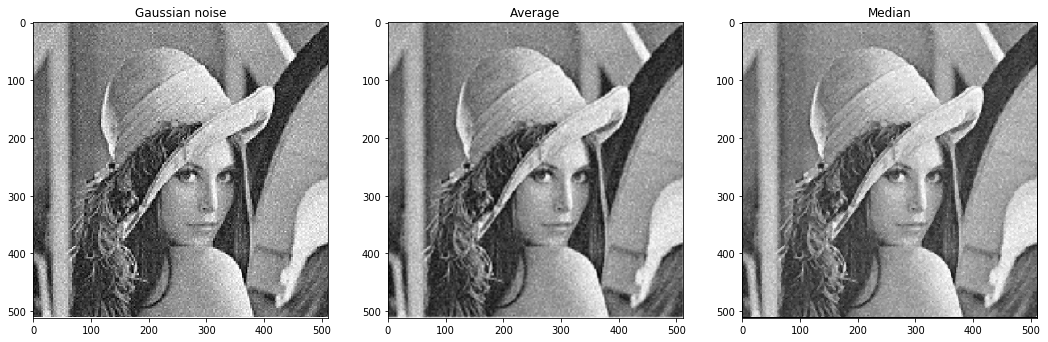

In [39]:
# Gaussian noise
img = cv2.imread("problem2/lena(GausiaanNoise).bmp",0)

# 평균값 필터링 마스크
avg_mask = np.ones((3,3)) / 9

# 평균값 필터링 연산 수행
avg_img = cv2.filter2D(img, -1, avg_mask)

# 중간값 필터링 연산 수행
med_img = median_filtering(img, window_size=3)

# 결과 출력
plt.figure(figsize=(18,18))

plt.subplot(1,3,1)
plt.title("Gaussian noise")
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.title("Average")
plt.imshow(avg_img, cmap='gray')

plt.subplot(1,3,3)
plt.title("Median")
plt.imshow(med_img, cmap='gray')

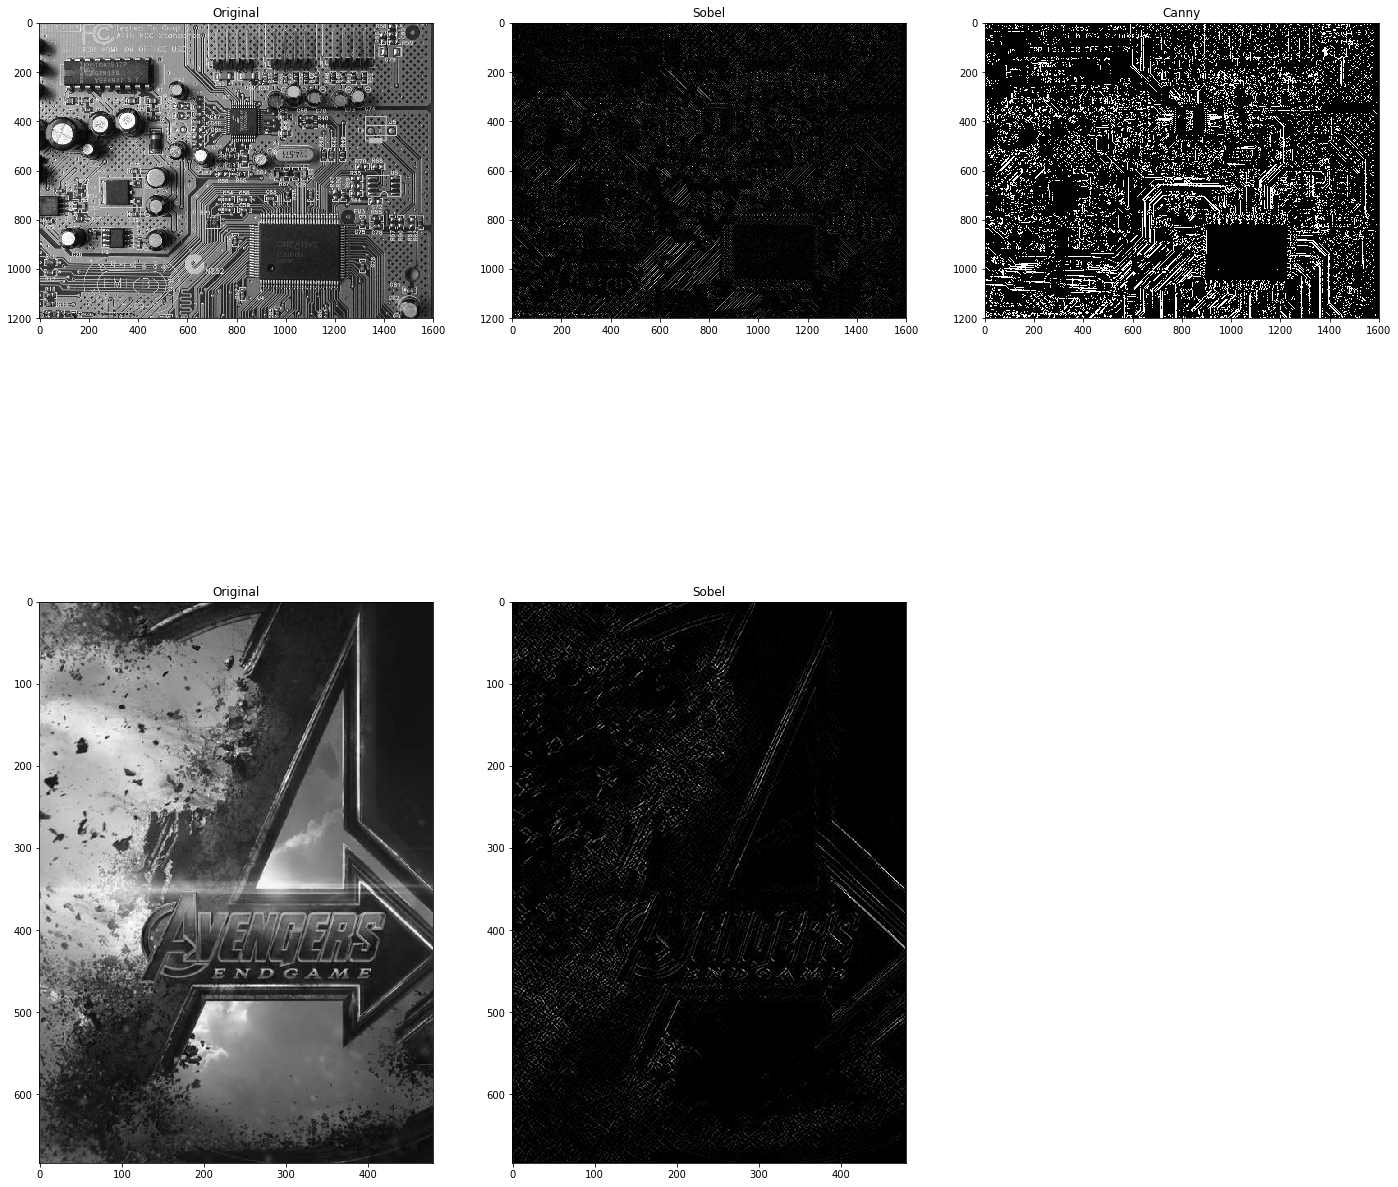

In [52]:
# Edga detection
img = cv2.imread("problem2/PCB2.jpg", 0)
img2 = cv2.imread("problem2/endgame.jpg", 0)

#                              (x, y) 미분 차수
edge_sobel = cv2.Sobel(img, -1, 1, 1)
edge_sobel_2 = cv2.Sobel(img2, -1, 1, 1)

#                           (weak, strong)
edge_canny = cv2.Canny(img, 100, 200)

# 결과 출력
plt.figure(figsize=(24,24))

plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(2,3,2)
plt.title("Sobel")
plt.imshow(edge_sobel, cmap='gray')

plt.subplot(2,3,3)
plt.title("Canny")
plt.imshow(edge_canny, cmap='gray')

plt.subplot(2,3,4)
plt.title("Original")
plt.imshow(img2, cmap='gray')

plt.subplot(2,3,5)
plt.title("Sobel")
plt.imshow(edge_sobel_2, cmap='gray')

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# path를 입력받아 immread하고, BGR2RGB로 convert하는 함수
def MyImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "영상 로드 실패"
    
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

In [3]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    nfeatres: 점수가 높은 n개의 특징점을 리턴 (-1이면 찾은 모든 특징점을 리턴)
#    nOctaveLayers: 몇개의 옥타브를 사용할지 (스케일 공간에서)
#    contrastThreshold: 약한 특징점을 제거하기 위한 threshold값 (클수록 조금 검출됨)
#    edgeThreshold: edge-like 한 특징점을 제거하기 위한 threshold값 (클수록 많이 검출됨)
#    sigma: 첫 가우시안 블러의 sigma 값

def SIFT(img, nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3 # 특징점을 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1 이면 윈 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)
    
    if draw_rich:
        kp_xy = cv2.drawKeypoints(result_img, kp, result_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else:
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
            
    return result_img

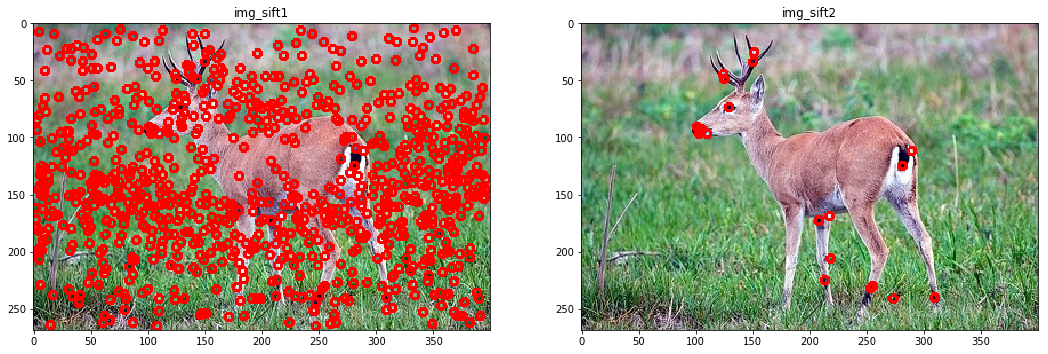

In [107]:
deer = MyImread("./problem2/deer.jpg")

img_sift1 = SIFT(deer, nfeatures=0)
img_sift2 = SIFT(deer, nfeatures=30)

plt.figure(figsize=(18,18))

plt.subplot(1,2,1)
plt.title("img_sift1")
plt.imshow(img_sift1)

plt.subplot(1,2,2)
plt.title("img_sift2")
plt.imshow(img_sift2)

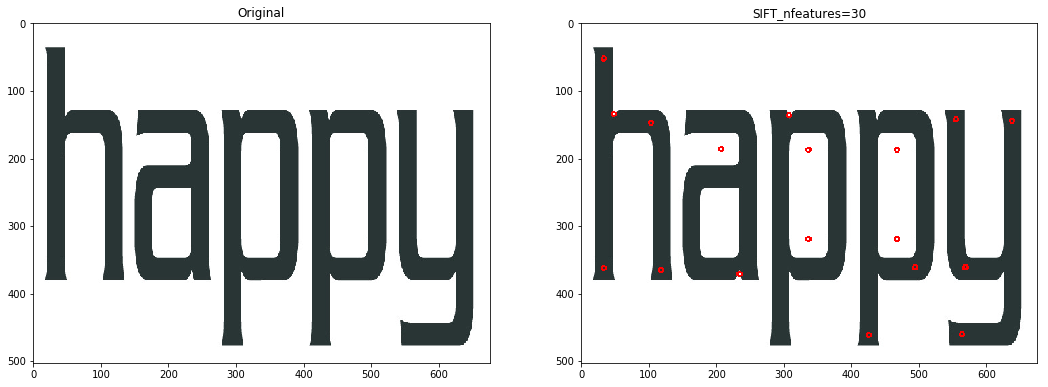

In [5]:
picture1 = MyImread("./problem2/happy.jpg")
picture_s1 = MyImread("./problem2/happy_s.jpg")

picture2 = MyImread("./problem2/hy.jpg")
picture_s2 = MyImread("./problem2/hy_s.jpg")

img1 = SIFT(picture1, nfeatures=0)
img2 = SIFT(picture1, nfeatures=30)
# img3 = SIFT(picture2, nfeatures=30)
# img4 = SIFT(picture2, nfeatures=30)

plt.figure(figsize=(18,18))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(picture1)

plt.subplot(2,2,2)
plt.title("SIFT_nfeatures=30")
plt.imshow(img2)

#plt.subplot(2,1,1)
#plt.title("Original")
#plt.imshow(picture2)

#plt.subplot(2,1,2)
#plt.title("SIFT_nfeatures=300")
#plt.imshow(img4)

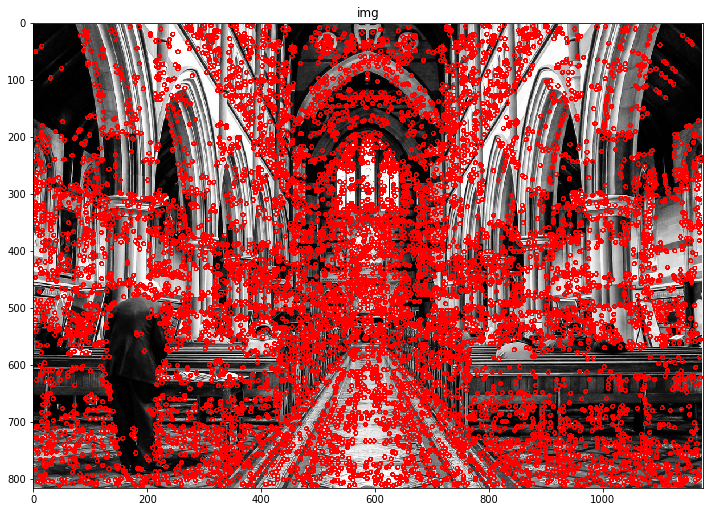

In [129]:
picture = MyImread("./problem2/church.png")

img = SIFT(picture, nfeatures=0)

plt.figure(figsize=(12,12))

plt.title("img")
plt.imshow(img)

In [104]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    hessianThreshlod: 헤시안 행렬 검출에 사용될 threshold
#    nOctaves: 몇 개의 옥타브를 사용할지
#    nOctaveLayers: 한 옥타브에서 몇개의 레이어를 사용할지

def SURF(img, hessianThreshold=400, nOctaves=4, nOctaveLayers=3):
    radian = 3 # 특징점을 표시할 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy:
        cv2.circle(result_img, (x,y), radian, color, thickness)
    
    return result_img

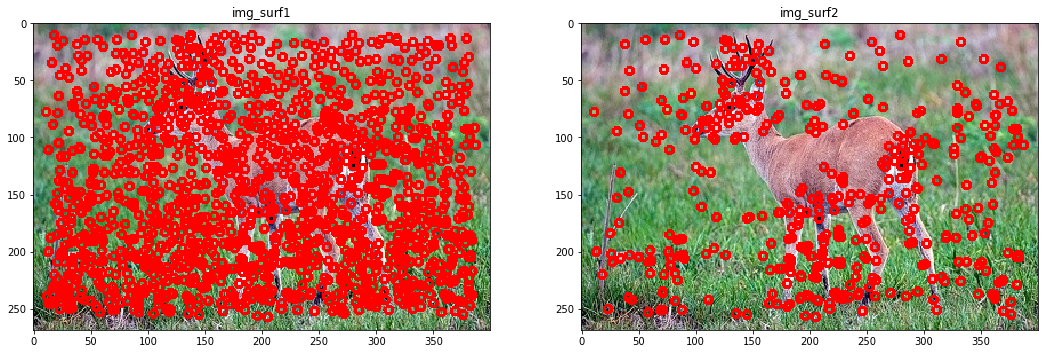

In [109]:
deer = MyImread("./problem2/deer.jpg")

img_surf1 = SURF(deer, hessianThreshold=400)
img_surf2 = SURF(deer, hessianThreshold=1000)

plt.figure(figsize=(18,18))

plt.subplot(1,2,1)
plt.title("img_surf1")
plt.imshow(img_surf1)

plt.subplot(1,2,2)
plt.title("img_surf2")
plt.imshow(img_surf2)

In [64]:
# 영상(RGB)을 입력받아 특징점을 찾고,
# 찾은 특징점을 그려 return하는 함수
#
#    type: 5/8, 7/12, 9/16 세가지가 존재

def FAST(img, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8):
    radian = 3 # 특징점을 표시할 윈의 반지름
    color = (255, 0, 0) # 특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    fast = cv2.FastFeatureDetector_create(type=type, nonmaxSuppression=True)
    kp = fast.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy:
        cv2.circle(result_img, (x,y), radian, color, thickness)
    
    return result_img

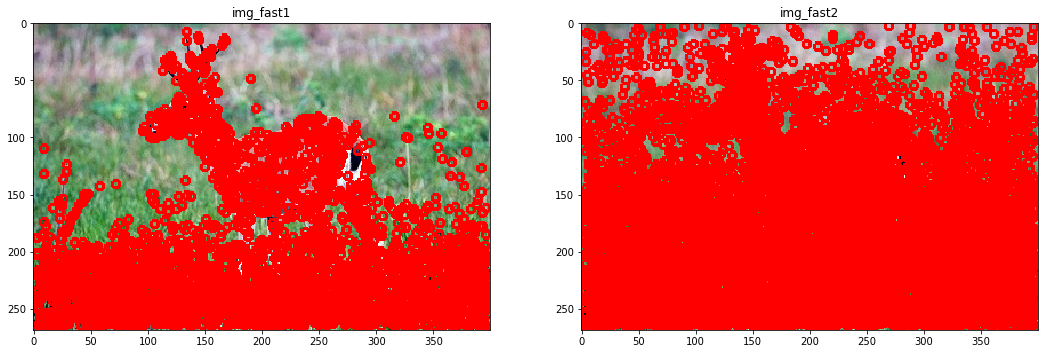

In [108]:
#lena = MyImread("./practice5/lena.png") 없어도 됨

img_fast1 = FAST(deer, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
img_fast2 = FAST(deer, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

plt.figure(figsize=(18,18))

plt.subplot(1,2,1)
plt.title("img_fast1")
plt.imshow(img_fast1)

plt.subplot(1,2,2)
plt.title("img_fast2")
plt.imshow(img_fast2)

In [110]:
leaf = MyImread("./problem2/Leaf.jpg")
leaf_s = MyImread("./problem2/Leaf_s.jpg")

plt.figure(figsize=(18,18))

# SIFT
leaf_sift1 = SIFT(leaf, nfeatures=0)
leaf_sift2 = SIFT(leaf, nfeatures=30)

plt.subplot(3,2,1)
plt.title("SIFT_nfeatures=0")
plt.imshow(leaf_sift1)

plt.subplot(3,2,2)
plt.title("SIFT_nfeatures=30")
plt.imshow(leaf_sift2)

# SURF
leaf_surf1 = SURF(leaf, hessianThreshold=400)
leaf_surf2 = SURF(leaf, hessianThreshold=1000)

plt.subplot(3,2,3)
plt.title("SURF_hessianThresholds=400")
plt.imshow(leaf_surf1)

plt.subplot(3,2,4)
plt.title("SURF_hessianThreshold=1000")
plt.imshow(leaf_surf2)

#FAST
leaf_fast1 = FAST(leaf, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
leaf_fast2 = FAST(leaf, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

plt.subplot(3,2,5)
plt.imshow(leaf_surf1)
plt.title("FAST_1_TYPE_5_8")

plt.subplot(3,2,6)
plt.imshow(leaf_surf2)
plt.title("FAST_2_TYPE_7_12")

AssertionError: 영상 로드 실패

Text(0.5, 1.0, 'FAST_rotate')

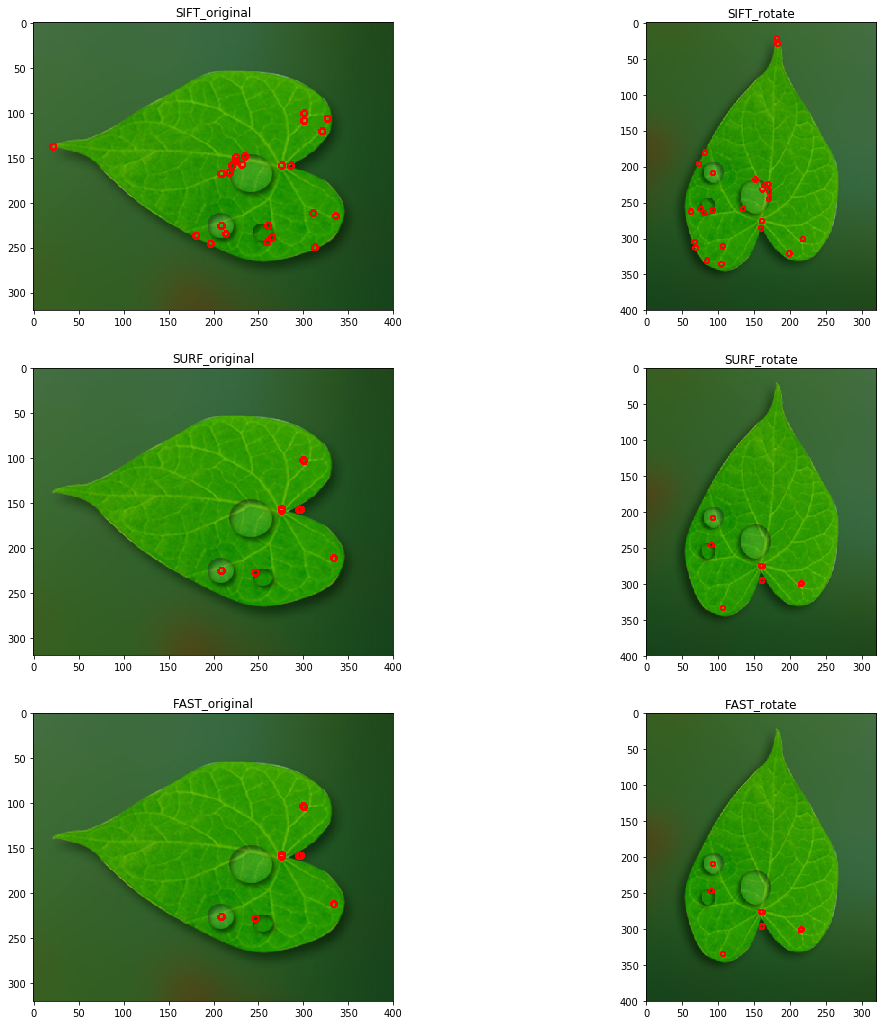

In [119]:
leaf = MyImread("./problem2/Leaf.jpg")
leaf_s = MyImread("./problem2/Leaf_ss.jpg")

plt.figure(figsize=(18,18))

# SIFT
leaf_sift = SIFT(leaf, nfeatures=30)
leaf_sift_s = SIFT(leaf_s, nfeatures=30)

plt.subplot(3,2,1)
plt.title("SIFT_original")
plt.imshow(leaf_sift)

plt.subplot(3,2,2)
plt.title("SIFT_rotate")
plt.imshow(leaf_sift_s)

# SURF
leaf_surf = SURF(leaf, hessianThreshold=1000)
leaf_surf_s = SURF(leaf_s, hessianThreshold=1000)

plt.subplot(3,2,3)
plt.title("SURF_original")
plt.imshow(leaf_surf)

plt.subplot(3,2,4)
plt.title("SURF_rotate")
plt.imshow(leaf_surf_s)

#FAST
leaf_fast = FAST(leaf, type=cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
leaf_fast_s = FAST(leaf_s, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

plt.subplot(3,2,5)
plt.imshow(leaf_surf)
plt.title("FAST_original")

plt.subplot(3,2,6)
plt.imshow(leaf_surf_s)
plt.title("FAST_rotate")